<a href="https://colab.research.google.com/github/59822/ml_models/blob/main/XDXDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOLA

In [275]:
import kagglehub
import os
import shutil

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# Download latest version
path = kagglehub.dataset_download("burak3ergun/loan-data-set")
print("Path to dataset files:", path)

filename = os.path.basename(path)
moved = '/content/' + filename + '.csv'

if not os.path.exists(moved):
  shutil.move(path, moved)
  print("Succesfully moved!")
else:
  print("Is already moved!")


Path to dataset files: /root/.cache/kagglehub/datasets/burak3ergun/loan-data-set/versions/1
Is already moved!


In [276]:
dt = pd.read_csv("/content/1.csv/loan_data_set.csv")
dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [277]:
dt.shape

(614, 13)

In [278]:
# Vamos a conservar la cantidad y vamos a ver donde monda esta el error para eso vamos a ver si usamos la media o la moda
# Para saber eso toca hacer un histograma
dt.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [279]:
dt.drop(['Loan_ID'], axis = 1, inplace = True)

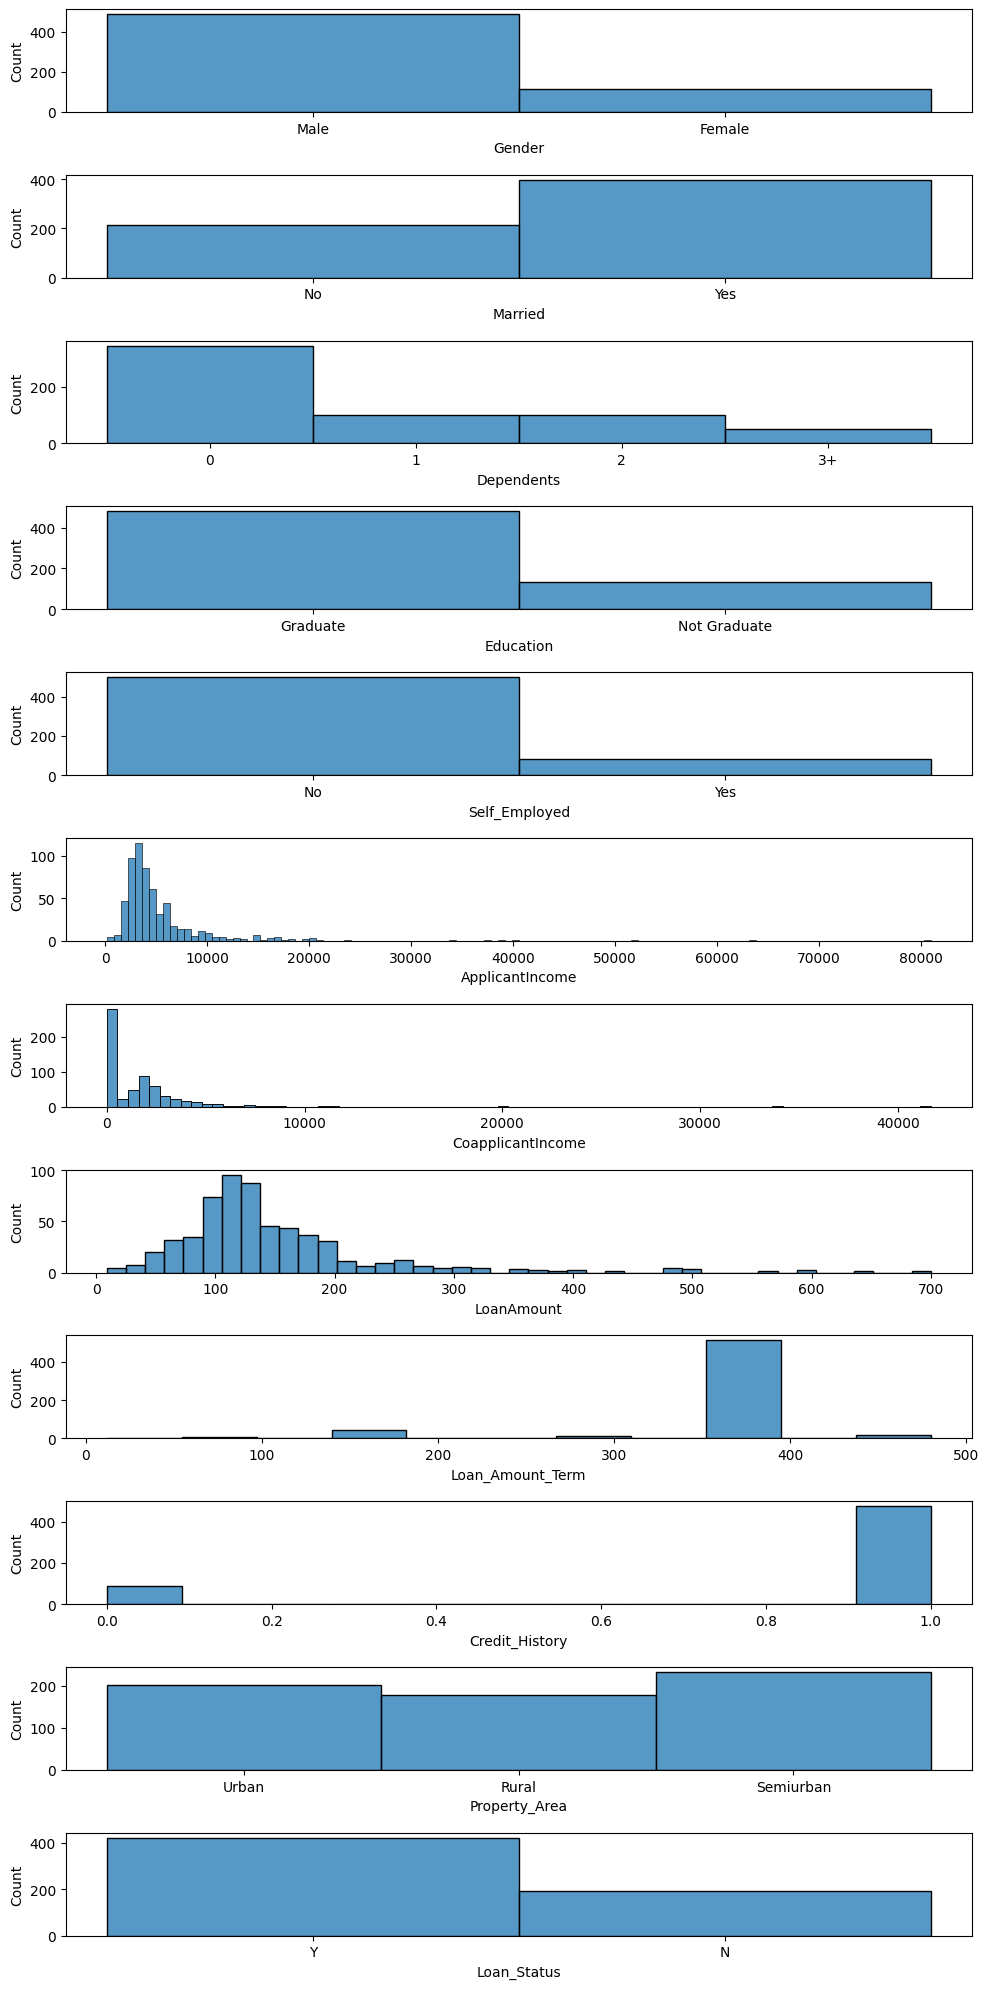

In [280]:
fig, axes = plt.subplots(nrows=len(dt.columns), ncols=1, figsize=(10, 20))

for i, col in enumerate(dt.columns):
    sns.histplot(data=dt, x=col, ax=axes[i])

plt.tight_layout()
plt.show()


In [281]:
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for col in columns:
  dt[col] = dt[col].fillna(dt[col].median())

columnas_cat_nan = dt.columns[dt.isna().any()]
col_ca = columnas_cat_nan.tolist()
for col in col_ca:
  dt[col] = dt[col].fillna(dt[col].mode()[0])

dt.isnull().sum()
#columnas_cat_nan.tolist()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [282]:
dt.shape

(614, 12)

In [283]:
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for col in columns:
  Q1 = dt[col].quantile(0.25)
  Q3 = dt[col].quantile(0.75)
  IQR = Q3 - Q1

  dt = dt[~((dt[col] < (Q1 - 1.5 * IQR)) | (dt[col] > (Q3 + 1.5 * IQR)))]


In [284]:
dt.shape

(520, 12)

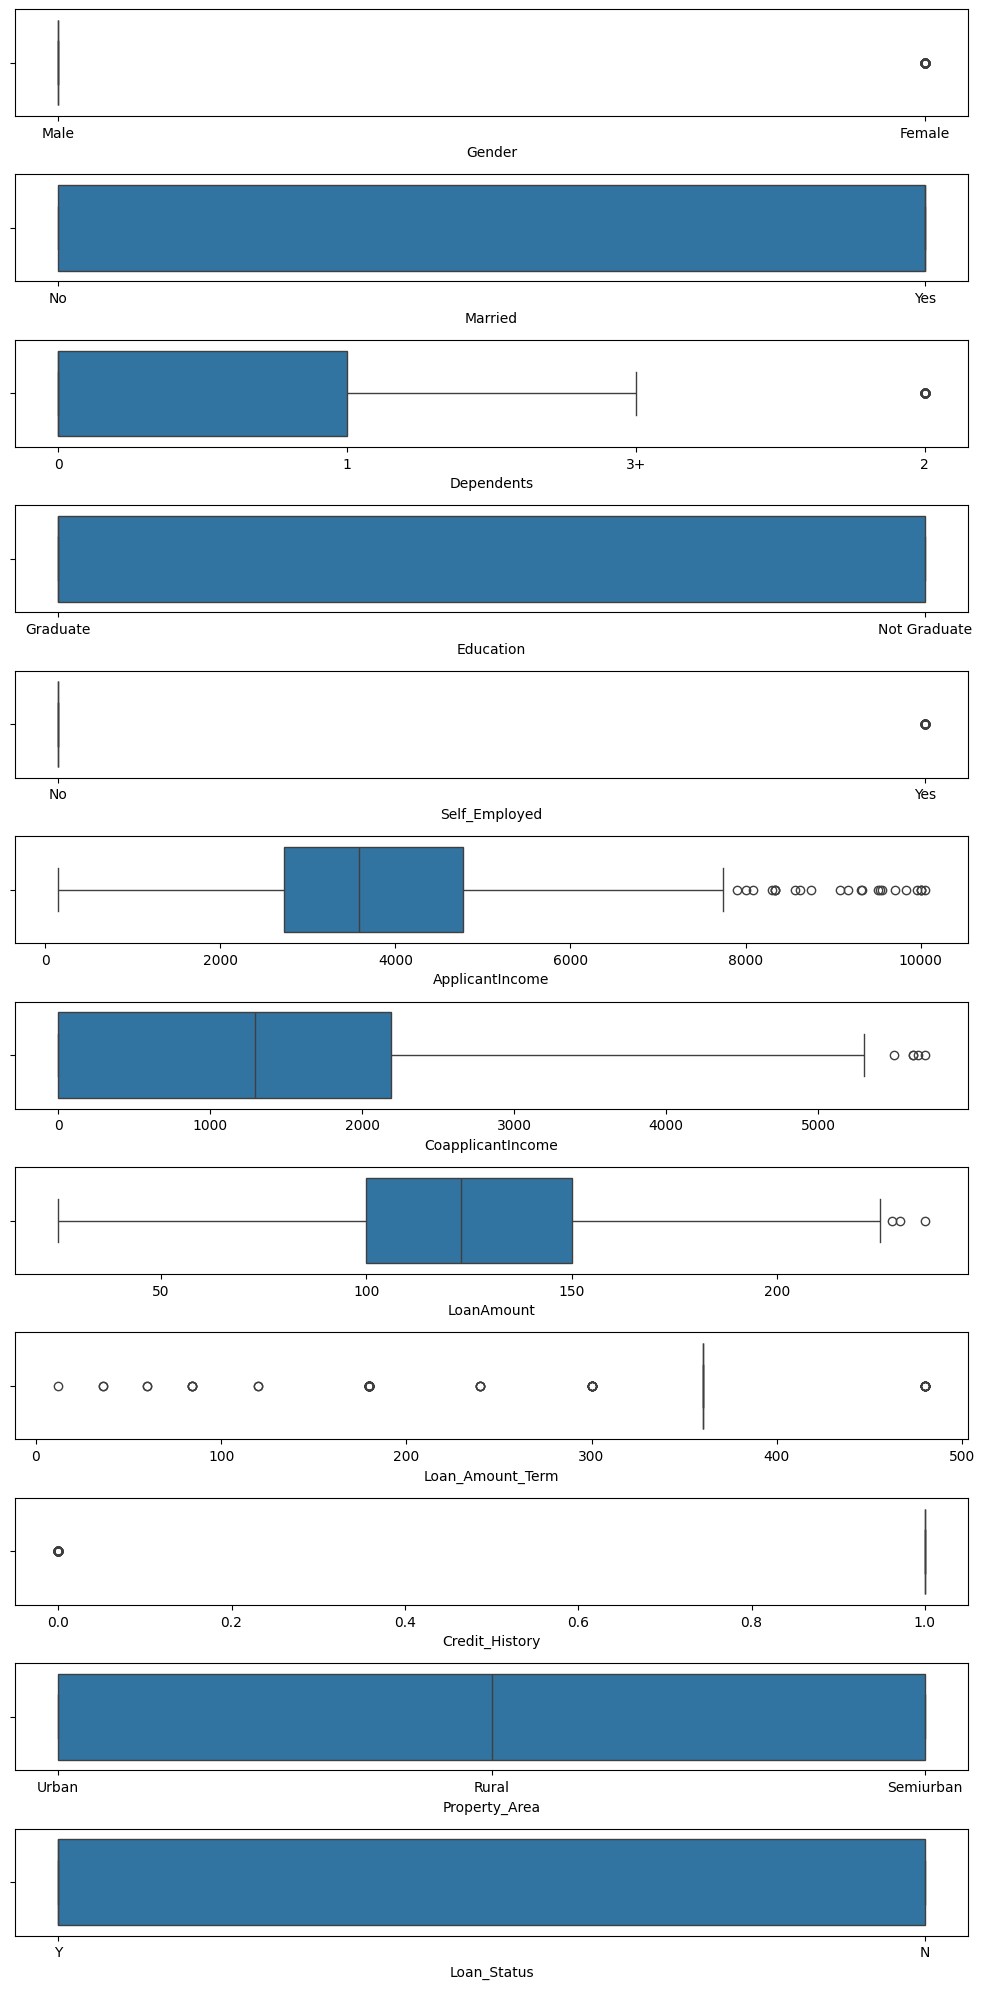

In [285]:
### Outliers
fig, axes = plt.subplots(nrows=len(dt.columns), ncols=1, figsize=(10, 20))

for i, col in enumerate(dt.columns):
    sns.boxplot(data=dt, x=col, ax=axes[i])

plt.tight_layout()
plt.show()

In [286]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,520.0,3995.719231,1794.687196,150.0,2724.5,3590.5,4772.75,10047.0
CoapplicantIncome,520.0,1317.578692,1397.402837,0.0,0.0,1293.5,2191.00,5701.0
LoanAmount,520.0,123.651923,39.749892,25.0,100.0,123.0,150.00,236.0
Loan_Amount_Term,520.0,342.576923,65.618547,12.0,360.0,360.0,360.00,480.0
Credit_History,520.0,0.851923,0.355518,0.0,1.0,1.0,1.00,1.0


In [287]:
dt.ApplicantIncome = np.sqrt(dt.ApplicantIncome)
dt.CoapplicantIncome = np.sqrt(dt.CoapplicantIncome)
dt.LoanAmount = np.sqrt(dt.LoanAmount)


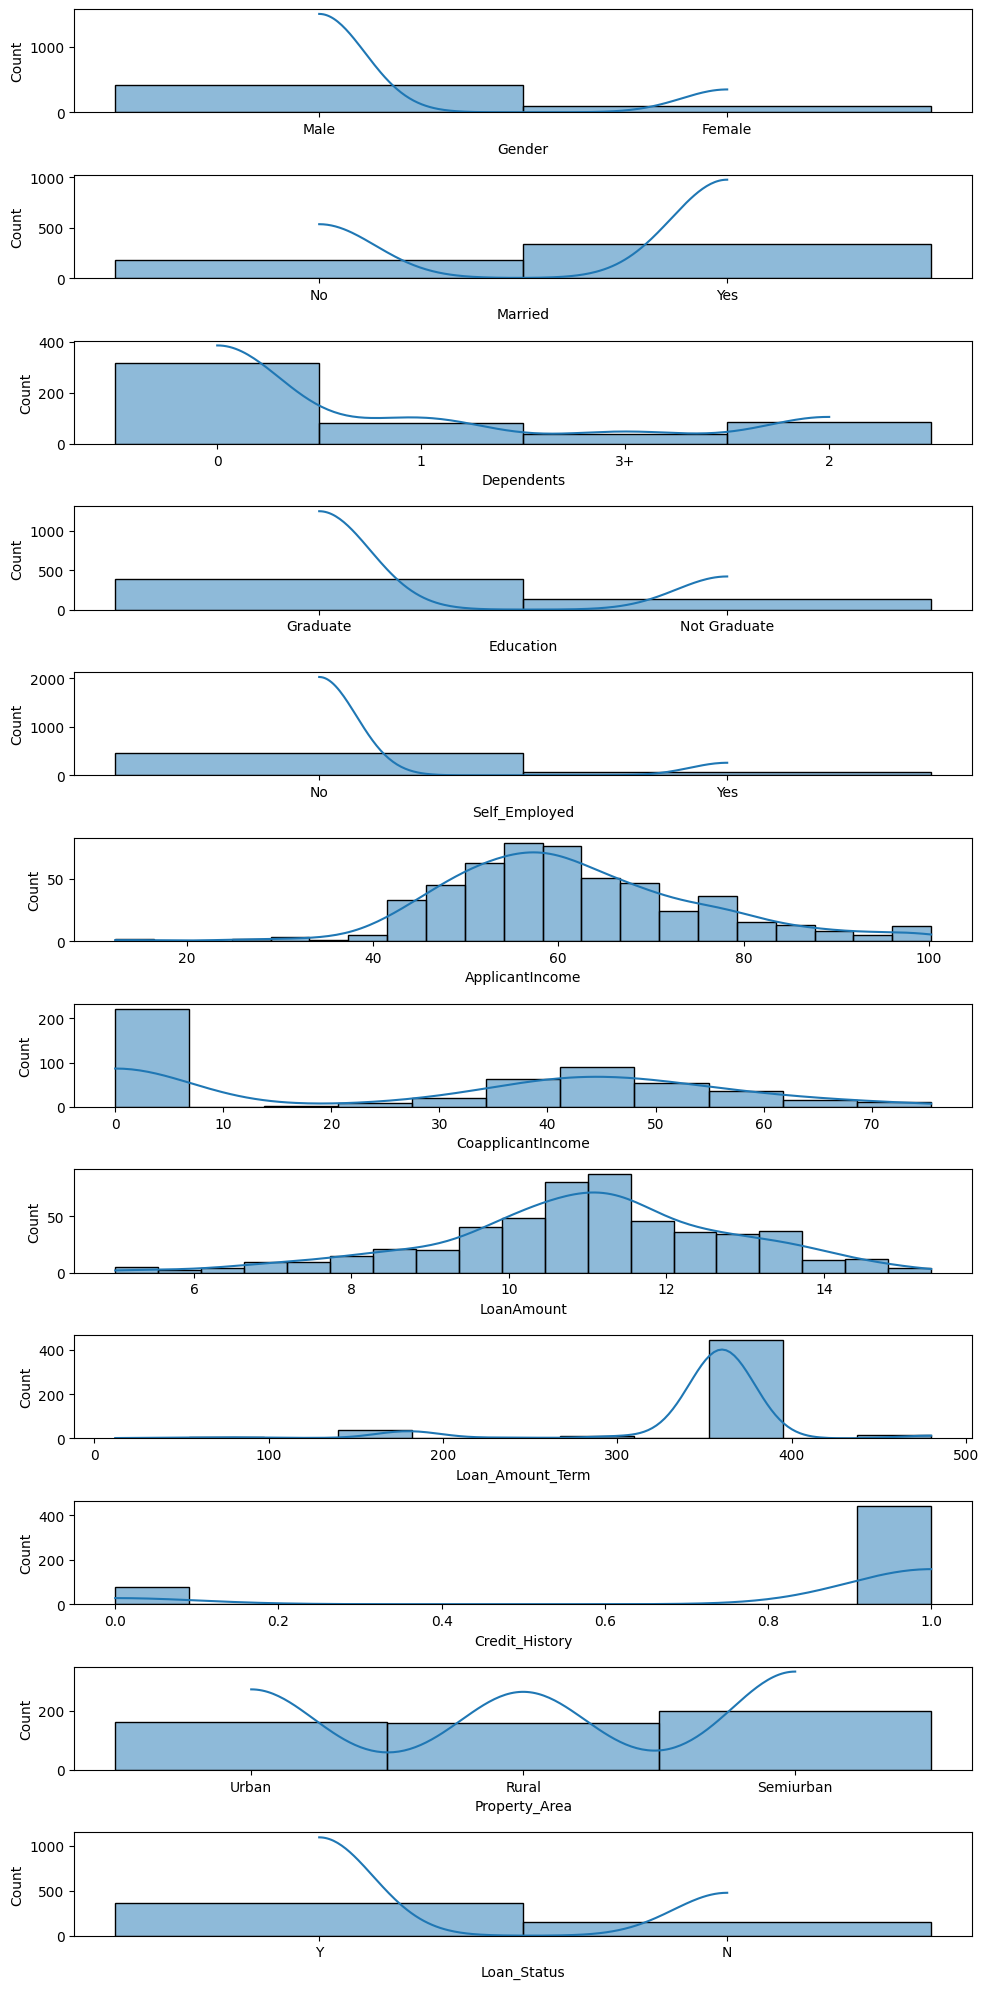

In [288]:
fig, axes = plt.subplots(nrows=len(dt.columns), ncols=1, figsize=(10, 20))

for i, col in enumerate(dt.columns):
    sns.histplot(data=dt, x=col, ax=axes[i], kde = True)

plt.tight_layout()
plt.show()


In [289]:
dt.shape

(520, 12)

In [290]:
#dt = pd.get_dummies(dt, columns=['Education', 'Self_Employed', 'Credit_History' ], drop_first=True)
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             520 non-null    object 
 1   Married            520 non-null    object 
 2   Dependents         520 non-null    object 
 3   Education          520 non-null    object 
 4   Self_Employed      520 non-null    object 
 5   ApplicantIncome    520 non-null    float64
 6   CoapplicantIncome  520 non-null    float64
 7   LoanAmount         520 non-null    float64
 8   Loan_Amount_Term   520 non-null    float64
 9   Credit_History     520 non-null    float64
 10  Property_Area      520 non-null    object 
 11  Loan_Status        520 non-null    object 
dtypes: float64(5), object(7)
memory usage: 52.8+ KB


In [291]:
bool_cols = dt.select_dtypes(include = [np.bool_], )

dt['Married'] = dt['Married'].map({'No': 0, 'Yes': 1})
'''for col in bool_cols:
    dt[col] = dt[col].astype(int)'''

'for col in bool_cols:\n    dt[col] = dt[col].astype(int)'

In [292]:
dt.shape

(520, 12)

In [293]:
dt.drop(['Dependents'], axis =1, inplace = True)


In [294]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Married,520.0,0.646154,0.478623,0.000000,0.000000,1.000000,1.000000,1.000000
ApplicantIncome,520.0,61.720496,13.662303,12.247449,52.196737,59.920777,69.084846,100.234725
CoapplicantIncome,520.0,26.763598,24.544797,0.000000,0.000000,35.965147,46.808086,75.504967
LoanAmount,520.0,10.963114,1.862454,5.000000,10.000000,11.090537,12.247449,15.362291
Loan_Amount_Term,520.0,342.576923,65.618547,12.000000,360.000000,360.000000,360.000000,480.000000
Credit_History,520.0,0.851923,0.355518,0.000000,1.000000,1.000000,1.000000,1.000000


In [295]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
columns.append('Loan_Amount_Term')
print(columns)


for col in columns:
  dt[col] = sc.fit_transform(dt[[col]])

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [296]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Married,520.0,0.646154,0.478623,0.0,0.000000,1.000000,1.000000,1.0
ApplicantIncome,520.0,0.562275,0.155276,0.0,0.454035,0.541821,0.645973,1.0
CoapplicantIncome,520.0,0.354461,0.325075,0.0,0.000000,0.476328,0.619934,1.0
LoanAmount,520.0,0.575463,0.179734,0.0,0.482519,0.587760,0.699406,1.0
Loan_Amount_Term,520.0,0.706361,0.140211,0.0,0.743590,0.743590,0.743590,1.0
Credit_History,520.0,0.851923,0.355518,0.0,1.000000,1.000000,1.000000,1.0


In [310]:
df = dt.copy()

In [298]:
print(dt['Education'].unique)

<bound method Series.unique of 0          Graduate
1          Graduate
2          Graduate
3      Not Graduate
4          Graduate
           ...     
608        Graduate
609        Graduate
610        Graduate
612        Graduate
613        Graduate
Name: Education, Length: 520, dtype: object>


In [299]:
dt.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,0,Graduate,No,0.730007,0.000000,0.609297,0.74359,1.0,Urban,Y
1,Male,1,Graduate,No,0.630209,0.514310,0.609297,0.74359,1.0,Rural,N
2,Male,1,Graduate,Yes,0.483306,0.000000,0.301481,0.74359,1.0,Urban,Y
3,Male,1,Not Graduate,No,0.438424,0.643126,0.574627,0.74359,1.0,Urban,Y
4,Male,0,Graduate,No,0.741155,0.000000,0.663400,0.74359,1.0,Urban,Y


In [311]:
'''
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Education'] = df['Education'].map({'Not Graduate': 0, 'Graduate': 1})  # Map 'Education' to itself
df['Self_Employed'] = df['Self_Employed'].map({'No': 0, 'Yes': 1})
df['Property_Area'] = df['Property_Area'].map({'Urban': 0, 'Rural': 1, 'Semiurban':2})  # Map 'Property_Area' to itself
'''

In [314]:
#df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1})

data = df.copy()
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,0.730007,0.000000,0.609297,0.74359,1.0,0,1
1,0,1,1,0,0.630209,0.514310,0.609297,0.74359,1.0,1,0
2,0,1,1,1,0.483306,0.000000,0.301481,0.74359,1.0,0,1
3,0,1,0,0,0.438424,0.643126,0.574627,0.74359,1.0,0,1
4,0,0,1,0,0.741155,0.000000,0.663400,0.74359,1.0,0,1


In [316]:
X = data.drop(['Loan_Status'], axis = 1)
y = data['Loan_Status']
X

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,1,0,0.730007,0.000000,0.609297,0.743590,1.0,0
1,0,1,1,0,0.630209,0.514310,0.609297,0.743590,1.0,1
2,0,1,1,1,0.483306,0.000000,0.301481,0.743590,1.0,0
3,0,1,0,0,0.438424,0.643126,0.574627,0.743590,1.0,0
4,0,0,1,0,0.741155,0.000000,0.663400,0.743590,1.0,0
...,...,...,...,...,...,...,...,...,...,...
608,0,1,1,0,0.506928,0.584846,0.520378,0.743590,1.0,1
609,1,0,1,0,0.472843,0.000000,0.330636,0.743590,1.0,1
610,0,1,1,0,0.589070,0.000000,0.127825,0.358974,1.0,1
612,0,1,1,0,0.850498,0.000000,0.837150,0.743590,1.0,0


In [338]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [318]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
Standar = StandardScaler()
X_train = Standar.fit_transform(X_train)
X_test = Standar.fit_transform(X_test)

In [339]:
model = LogisticRegression(max_iter = 500 )
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [340]:
y_pred = model.predict(X_test)

In [341]:

from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(round(accuracy, 2))

0.83


In [342]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

Precision: 0.8110236220472441


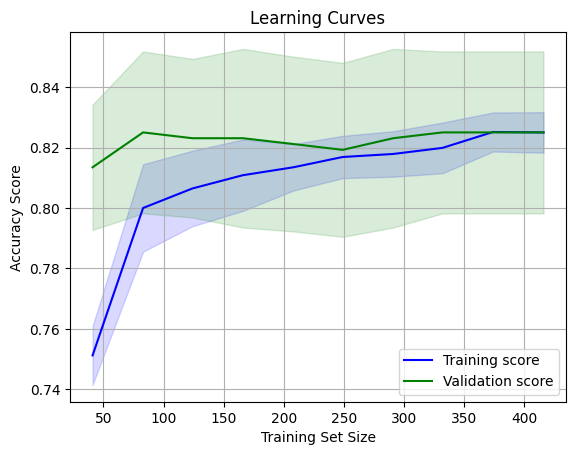

In [343]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression  # Or your chosen model

# Assuming you have:
# X: Features
# y: Target variable

# Create the model
model = LogisticRegression()

# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation score', color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()

In [344]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Or your chosen model
from sklearn.metrics import accuracy_score

# Assuming you have:
# X: Features
# y: Target variable

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on training and validation sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")

Training Accuracy: 0.8293269230769231
Validation Accuracy: 0.8076923076923077


X = df.drop(['Loan_Status'])
y = df['Loan_Status']
X